# Horizontal-to-Vertical Spectral Ratio (HVSR) Measurements from Microtremor Recordings (mHVSR) Under the Diffuse Field Assumption (DFA)

## License Information

This file is part of _hvsrpy_, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2023 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_

_hvsrpy_ is an open-source Python package for performing horizontal-to-vertical spectral ratio (HVSR) processing of microtremor and earthquake recordings. _hvsrpy_ was developed by [Jospeh P. Vantassel](https://www.jpvantassel.com/) with contributions from Dana M. Brannon under the supervision of Professor Brady R. Cox at The University of Texas at Austin. _hvsrpy_ continues to be developed and maintained by [Joseph P. Vantassel and his research group at Virginia Tech](https://geoimaging-research.org/).

## Citation

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for hvsrpy, please use the citation tool on the hvsrpy
[archive](http://doi.org/10.5281/zenodo.3666956)._

## About this notebook

This notebook illustrates how _hvsrpy_ can be used for performing HVSR on microtremor records (mHVSR) under the diffuse field assumption (DFA). The DFA for HVSR was proposed by Sánchez-Sesma et al. (2011). The microtremor data presented are those by Cox and Vantassel (2018).

>Sánchez-Sesma, F.J., Rodríguez, M., Iturrarán-Viveros, U., Luzón, F., Campillo, M., Margerin, L., García-Jerez, A., Suarez, M., Santoyo, M.A., Rodríguez-Castellanos, A. (2011). A theory for microtremor H/V spectral ratio: application for a layered medium: Theory for microtremor H/V spectral ratio. Geophysical Journal International 186, 221–225. https://doi.org/10.1111/j.1365-246X.2011.05064.x

>Cox, B., Vantassel, J. (2018). Dynamic Characterization of Wellington, New Zealand. DesignSafe-CI [publisher]. https://doi.org/10.17603/DS24M6J

## Getting Started

1. Install _hvsrpy_, with `pip install hvsrpy`. If you are not familiar with _pip_, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__
2. Try analyzing the three provided examples. The names of these files have been written and commented out in the section _Input Data_ for your convenience. __(~15 minutes)__
3. Try one of your own _miniSEED_ (or other accepted format) files by changing the input file names below.  __(~15 minutes)__

Happy Processing!



In [1]:
import time
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import hvsrpy
from hvsrpy import plot_tools

plt.style.use("data/hvsrpy.mplstyle")

## Input Data

In [2]:
# Input file name (may be a relative or full path).
fnames = [["./data/UT.STN11.A2_C50.miniseed"]]
# fnames = [["./data/UT.STN11.A2_C150.miniseed"]]
# fnames = [["./data/UT.STN11.A2_C300.miniseed"]]

print(f"Number of recordings: {len(fnames)}")
for fname_set in fnames:
    for file in fname_set:
        if not pathlib.Path(file).exists():
            raise FileNotFoundError(f"file {file} not found; check spelling.")
print("All files exists")

Number of recordings: 1
All files exists


## Preprocessing Settings

In [3]:
preprocessing_settings = hvsrpy.settings.HvsrPreProcessingSettings()
preprocessing_settings.detrend = "linear"
preprocessing_settings.window_length_in_seconds = 60
preprocessing_settings.orient_to_degrees_from_north = 0.0
preprocessing_settings.filter_corner_frequencies_in_hz=(None, None)

print("Preprocessing Summary")
print("-"*60)
preprocessing_settings.psummary()

Preprocessing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
orient_to_degrees_from_north             : 0.0
filter_corner_frequencies_in_hz          : (None, None)
window_length_in_seconds                 : 60
detrend                                  : linear
preprocessing_method                     : hvsr


## HVSR Settings
---

In [4]:
processing_settings = hvsrpy.settings.HvsrDiffuseFieldProcessingSettings()
processing_settings.window_type_and_width = ("tukey", 0.1)
processing_settings.smoothing=dict(operator="log_rectangular",
                                   bandwidth=0.02,
                                   center_frequencies_in_hz=np.geomspace(0.1, 50, 512))

print("Processing Summary")
print("-"*60)
processing_settings.psummary()

Processing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
window_type_and_width                    : ('tukey', 0.1)
smoothing                                :
     operator                            : log_rectangular
     bandwidth                           : 0.02
     center_frequencies_in_hz            : [0.1, 0.101223591337 ... 9559972058108, 50.0]
fft_settings                             : None
handle_dissimilar_time_steps_by          : keeping_majority_time_step
processing_method                        : diffuse_field


## Calculate

In [5]:
srecords = hvsrpy.read(fnames)
srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
hvsr = hvsrpy.process(srecords, processing_settings)

## Plot HVSR

NotImplementedError: Can only plot valid HVSR curves from HvsrTraditional and HvsrAzimuthal objects.

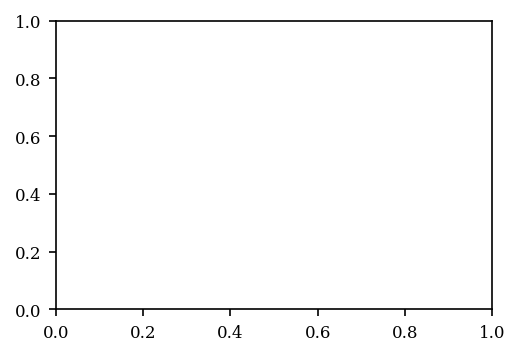

In [6]:
(fig, ax) = hvsrpy.plot_tools.plot_single_panel_hvsr_curves(hvsr)

## Save Results to Text File
---

In [ ]:
file_name_out = "example_output_hvsrpy.hv"

hv.to_file(file_name_out, distribution_f0, distribution_mc, data_format="hvsrpy")
print("Results saved successfully!")

## Save Results to Geopsy-Style Text File
---

In [ ]:
file_name_out = "example_output_geopsy.hv"

hv.to_file(file_name_out, distribution_f0, distribution_mc, data_format="geopsy")
print("Results saved successfully!")